In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
full = cv2.imread('../../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

In [10]:
full.shape

(1367, 1025, 3)

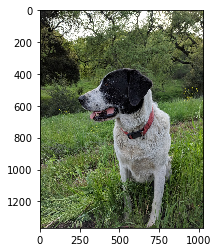

In [11]:
plt.imshow(full)

In [12]:
face = cv2.imread('../../DATA/sammy_face.jpg')
face =cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
noise = cv2.imread('../../DATA/sammy_noise.jpg')
noise =cv2.cvtColor(noise,cv2.COLOR_BGR2RGB)

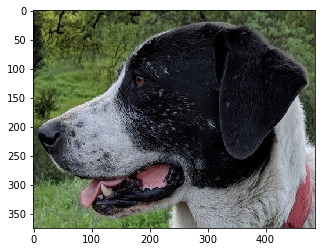

In [13]:
plt.imshow(face)

In [14]:
face.shape

(375, 486, 3)

In [23]:
sum([1,2,3])

6

In [24]:
mystring = 'sum'

In [25]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [15]:
myfunc = eval(mystring)
myfunc([1,2,4])

7

In [15]:
# All the 6 methods comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

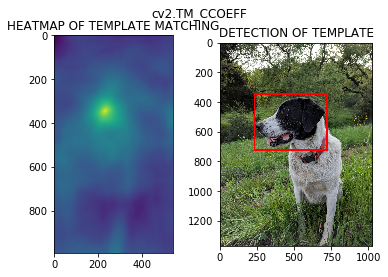

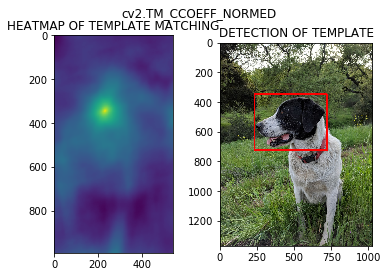

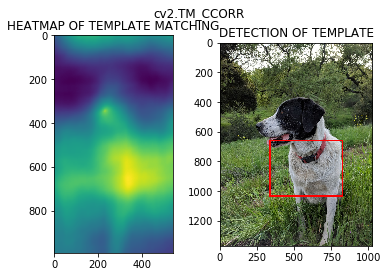

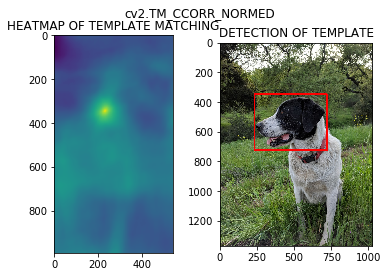

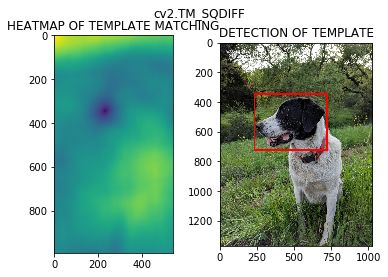

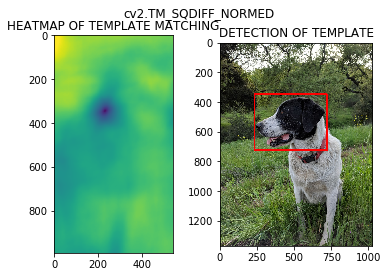

In [18]:
for m in methods:
    # CREATE A COPY
    full_copy = full.copy()
    method = eval(m)

    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy,face,method)

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

    # DRAW RED RECTANGLE
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc

    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)

    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)

    # PLOT AND SHOW THE IMAGES
    plt.subplot(121) #give me a subplot 1 row by 2 colums
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')

    plt.subplot(122) 
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')

In [39]:
full_copy = full.copy()
my_method = eval('cv2.TM_CCORR_NORMED')
res = cv2.matchTemplate(full_copy, face, my_method )

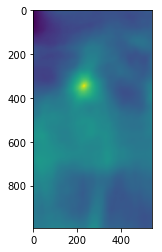

In [40]:
plt.imshow(res)